# CREATION OF CSV FILE

In [3]:
############################################################
##cleaned.csv formation
############################################################


import pandas as pd
import yfinance as yf


CONFIG_TARGET_INSTRUMENTS = ['WMT', 'KO', 'NEE']
start_date = "2004-01-01"
end_date = "2024-01-01"
cut_off_date = pd.Timestamp("2023-01-01", tz='US/Pacific') ## CUT DATE FOR TRAINING AND TEST DATA
# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate over each instrument
for instrument in CONFIG_TARGET_INSTRUMENTS:
    # Download historical data using yfinance
    historical_data = yf.download(instrument, start=start_date, end=end_date)
    historical_data['instrument'] = instrument

    # Reset the index to make 'Date' a column
    historical_data = historical_data.reset_index()
    #historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d %H:%M:%S%z')
    historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d 16:00:00%z')
    historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%Y-%m-%d %H:%M:%S%z').dt.tz_localize('US/Pacific')


    # lower case columns
    historical_data.columns = historical_data.columns.str.lower()

    ####################################################


    # Calculate the Typical Price
    typical_price = (historical_data['high'] + historical_data['low'] + historical_data['close']) / 3

    # Calculate the Traded Value (Typical Price * Volume)
    traded_value = typical_price * historical_data['volume']

    # Calculate Cumulative Traded Value
    cumulative_traded_value = traded_value.cumsum()

    # Calculate Cumulative Volume
    cumulative_volume = historical_data['volume'].cumsum()

    # Calculate VWAP
    vwap = cumulative_traded_value / cumulative_volume

    historical_data['weightedAverage'] = vwap
    ####################################################

    historical_data['quoteVolume'] = historical_data['volume'] * historical_data['weightedAverage']
    ####################################################

    # Merge the current instrument's data with the combined data
    if combined_data.empty:
        combined_data = historical_data
    else:
        combined_data=pd.concat([combined_data,historical_data], axis=0, ignore_index=True)

# Sort the combined data by date
combined_data = combined_data.sort_values(by='date')

# Reset index for the final combined data
combined_data = combined_data.reset_index(drop=True)

# Define the desired order of columns
desired_order = ['date', 'instrument', 'high', 'low', 'open', 'close', 'volume', 'quoteVolume','weightedAverage']
combined_data = combined_data[desired_order]


####################################################
combined_data = combined_data.dropna()
####################################################
#rounding to 8 decimals
combined_data = combined_data.round(8)
#combined_data['date'] = pd.to_datetime(combined_data['date'])
combined_data.to_csv('cleaned.csv', index=False)
####################################################

# Display the result
combined_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,date,instrument,high,low,open,close,volume,quoteVolume,weightedAverage
0,2004-01-02 16:00:00-08:00,WMT,53.400002,52.130001,53.349998,52.299999,8793900,4.626471e+08,52.610001
1,2004-01-02 16:00:00-08:00,KO,25.495001,25.004999,25.400000,25.174999,7210200,1.818773e+08,25.225000
2,2004-01-02 16:00:00-08:00,NEE,8.231250,8.113750,8.177500,8.128750,5442400,4.439865e+07,8.157917
3,2004-01-05 16:00:00-08:00,WMT,52.799999,51.580002,52.799999,52.119999,13451400,7.040721e+08,52.341923
4,2004-01-05 16:00:00-08:00,KO,25.295000,25.030001,25.174999,25.205000,9740200,2.454260e+08,25.197226
...,...,...,...,...,...,...,...,...,...
15094,2023-12-28 16:00:00-08:00,WMT,158.330002,157.500000,157.770004,157.570007,5592000,4.020958e+08,71.905537
15095,2023-12-28 16:00:00-08:00,KO,58.869999,58.529999,58.650002,58.750000,8400100,3.165157e+08,37.679996
15096,2023-12-29 16:00:00-08:00,KO,58.980000,58.630001,58.740002,58.930000,9241600,3.482463e+08,37.682469
15097,2023-12-29 16:00:00-08:00,WMT,158.080002,157.160004,157.529999,157.649994,7314200,5.260144e+08,71.916869


In [4]:
############################################################
##cleaned_preprocessed.csv formation
############################################################
import pandas as pd
FILE = "cleaned.csv"
df = pd.read_csv(FILE)
#INSTRUMENTS = ["AAPL","GOOGL","MSFT"]
#INSTRUMENTS = df['instrument'].unique().tolist()
INSTRUMENTS = CONFIG_TARGET_INSTRUMENTS
############################################################

COLS = ['high', 'low', 'open', 'close', 'volume', 'quoteVolume','weightedAverage']
SCOLS = ["vh","vl","vc","open_s","volume_s","quoteVolume_s","weightedAverage_s"]
OBS_COLS = ['vh', 'vl', 'vc', 'open_s', 'volume_s', 'quoteVolume_s', 'weightedAverage_s', 'vh_roll_7', 'vh_roll_14', 'vh_roll_30', 'vl_roll_7', 'vl_roll_14', 'vl_roll_30', 'vc_roll_7', 'vc_roll_14', 'vc_roll_30', 'open_s_roll_7', 'open_s_roll_14', 'open_s_roll_30', 'volume_s_roll_7', 'volume_s_roll_14', 'volume_s_roll_30', 'quoteVolume_s_roll_7', 'quoteVolume_s_roll_14', 'quoteVolume_s_roll_30', 'weightedAverage_s_roll_7', 'weightedAverage_s_roll_14', 'weightedAverage_s_roll_30']
EPISODE_LENGTH = 500


df["date"] = df["date"].apply(lambda x: pd.Timestamp(x, unit='s', tz='US/Pacific'))
df = df[df["instrument"].isin(INSTRUMENTS)].sort_values("date")
df["vh"] = df["high"]/df["open"]
df["vl"] = df["low"]/df["open"]
df["vc"] = df["close"]/df["open"]
df["open_s"] = df.groupby("instrument")["open"].apply(lambda x: x - x.shift(1))
df["volume_s"] = df.groupby("instrument")["volume"].apply(lambda x: x - x.shift(1))
df["quoteVolume_s"] = df.groupby("instrument")["quoteVolume"].apply(lambda x: x - x.shift(1))
df["weightedAverage_s"] = df.groupby("instrument")["weightedAverage"].apply(lambda x: x - x.shift(1))

new_cols = []

for col in SCOLS:
    print(col)
    df[col+"_roll_7"] = df.groupby("instrument")[col].apply(lambda x: x.rolling(7).mean().bfill())
    new_cols.append(col+"_roll_7")
    df[col+"_roll_14"] = df.groupby("instrument")[col].apply(lambda x: x.rolling(14).mean().bfill())
    new_cols.append(col+"_roll_14")
    df[col+"_roll_30"] = df.groupby("instrument")[col].apply(lambda x: x.rolling(30).mean().bfill())
    new_cols.append(col+"_roll_30")

SCOLS.extend(new_cols)
print(SCOLS)
###############################
df = df.dropna()
df = df.reset_index(drop=True)


# Filter data based on the cut-off date
train_data = df[df['date'] < cut_off_date]
test_data = df[df['date'] >= cut_off_date]


# Save the preprocessed datasets
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

<ipython-input-4-aba62877be96>:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["open_s"] = df.groupby("instrument")["open"].apply(lambda x: x - x.shift(1))
<ipython-input-4-aba62877be96>:24: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["volume_s"] = df.groupby("instrument")["volume"].ap

vh
vl
vc
open_s
volume_s
quoteVolume_s
weightedAverage_s
['vh', 'vl', 'vc', 'open_s', 'volume_s', 'quoteVolume_s', 'weightedAverage_s', 'vh_roll_7', 'vh_roll_14', 'vh_roll_30', 'vl_roll_7', 'vl_roll_14', 'vl_roll_30', 'vc_roll_7', 'vc_roll_14', 'vc_roll_30', 'open_s_roll_7', 'open_s_roll_14', 'open_s_roll_30', 'volume_s_roll_7', 'volume_s_roll_14', 'volume_s_roll_30', 'quoteVolume_s_roll_7', 'quoteVolume_s_roll_14', 'quoteVolume_s_roll_30', 'weightedAverage_s_roll_7', 'weightedAverage_s_roll_14', 'weightedAverage_s_roll_30']





# PREPARATION

In [5]:
##########################
###some libraries and imports
##########################
!pip install --upgrade -q tensorflow #needs to be 2.15
#one more library
!pip install -q tf-agents


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 33.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.2 MB/s eta 0:00:00


In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tqdm import tqdm
from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts
from tf_agents.policies.policy_saver import PolicySaver
from tf_agents.agents.ddpg import actor_network
from tf_agents.agents.ddpg import critic_network
from tf_agents.agents.ddpg import ddpg_agent
from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.trajectories import policy_step
from tf_agents.utils import common
import logging
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [7]:
##########################
###config.py: HYPERPARAMETERS
##########################

# Number of training iterations
CONFIG_NUM_ITERATIONS = 100
# Number of steps in each episode, specifies the number of time steps or interactions that make up a single episode in the reinforcement learning environment.
CONFIG_EPISODE_LENGTH = 100
# Number of steps to collect data in each iteration, determines the number of steps the agent will take in the environment to collect experiences during each iteration of the training loop.
CONFIG_COLLECT_STEPS_PER_ITERATION = 750

##############################
# Maximum length of the replay buffer
CONFIG_REPLAY_BUFFER_MAX_LENGTH = 100
# Batch size for training
CONFIG_BATCH_SIZE = 100
# Number of episodes for evaluation
CONFIG_NUM_EVAL_EPISODES = 4
###############################
 # Logging frequency, log training information every X steps
CONFIG_LOG_INTERVAL = 3
# Evaluation frequency, evaluate the agent every X steps
CONFIG_EVAL_INTERVAL = 3
# Frequency to save the model, save the model every X steps
CONFIG_MODEL_SAVE_FREQ = 3
# Fully connected layers for the actor network
CONFIG_actor_fc_layers=(200, 100)
# Fully connected layers for the critic network's observation branch
CONFIG_critic_obs_fc_layers=(200,)
# Fully connected layers for the critic network's action branch
CONFIG_critic_action_fc_layers=None
# Fully connected layers for the joint critic network
CONFIG_critic_joint_fc_layers=(150,)
# Standard deviation for Ornstein-Uhlenbeck noise
CONFIG_ou_stddev=0.5
# Damping factor for Ornstein-Uhlenbeck noise
CONFIG_ou_damping=0.3
# Soft update coefficient for target networks
CONFIG_target_update_tau=0.001
# Update target networks every 15 steps
CONFIG_target_update_period=15
# Clipping value for gradients with respect to actions
CONFIG_dqda_clipping=None
# Loss function for TD errors # TRY MSE
CONFIG_td_errors_loss_fn=tf.compat.v1.losses.huber_loss
# Discount factor
CONFIG_gamma=0.15
# Scaling factor for rewards
CONFIG_reward_scale_factor=1
# Clipping value for gradients during training
CONFIG_gradient_clipping=None
# Learning rate for the actor network
CONFIG_actor_learning_rate=1e-4
# Learning rate for the critic network
CONFIG_critic_learning_rate=1e-3
###############################
# Enable debug summaries
CONFIG_debug_summaries=False
# Summarize gradients and variables during training
CONFIG_summarize_grads_and_vars=False
###############################
# storage directories
CONFIG_LOGDIR="LOGDIR"
CONFIG_MODEL_SAVE = "model_save"

In [8]:
##########################
###config.py: ASSETS
##########################

CONFIG_FILE = "train_data.csv"
CONFIG_INSTRUMENTS_placeholder = ['ASST1', 'ASST2', 'ASST3']
CONFIG_INSTRUMENTS = CONFIG_TARGET_INSTRUMENTS
CONFIG_COLS = ['high', 'low', 'open', 'close', 'volume', 'quoteVolume', 'weightedAverage']
CONFIG_SCOLS = ['vh', 'vl', 'vc', 'open_s', 'volume_s', 'quoteVolume_s', 'weightedAverage_s', 'vh_roll_7', \
                'vh_roll_14', 'vh_roll_30', 'vl_roll_7', 'vl_roll_14', 'vl_roll_30', 'vc_roll_7', 'vc_roll_14', 'vc_roll_30', \
                'open_s_roll_7', 'open_s_roll_14', 'open_s_roll_30', 'volume_s_roll_7', 'volume_s_roll_14', 'volume_s_roll_30', \
                'quoteVolume_s_roll_7', 'quoteVolume_s_roll_14', 'quoteVolume_s_roll_30', 'weightedAverage_s_roll_7', \
                'weightedAverage_s_roll_14', 'weightedAverage_s_roll_30']
CONFIG_OBS_COLS = ['ASST1_vh', 'ASST2_vh', 'ASST3_vh', 'ASST1_vl', 'ASST2_vl', 'ASST3_vl', 'ASST1_vc', 'ASST2_vc', 'ASST3_vc', \
    'ASST1_open_s', 'ASST2_open_s', 'ASST3_open_s', 'ASST1_volume_s', 'ASST2_volume_s', 'ASST3_volume_s', 'ASST1_quoteVolume_s', \
        'ASST2_quoteVolume_s', 'ASST3_quoteVolume_s', 'ASST1_weightedAverage_s', 'ASST2_weightedAverage_s', 'ASST3_weightedAverage_s', \
            'ASST1_vh_roll_7', 'ASST2_vh_roll_7', 'ASST3_vh_roll_7', 'ASST1_vh_roll_14', 'ASST2_vh_roll_14', 'ASST3_vh_roll_14', \
                'ASST1_vh_roll_30', 'ASST2_vh_roll_30', 'ASST3_vh_roll_30', 'ASST1_vl_roll_7', 'ASST2_vl_roll_7', 'ASST3_vl_roll_7', \
                    'ASST1_vl_roll_14', 'ASST2_vl_roll_14', 'ASST3_vl_roll_14', 'ASST1_vl_roll_30', 'ASST2_vl_roll_30', 'ASST3_vl_roll_30', \
                        'ASST1_vc_roll_7', 'ASST2_vc_roll_7', 'ASST3_vc_roll_7', 'ASST1_vc_roll_14', 'ASST2_vc_roll_14', 'ASST3_vc_roll_14', \
                            'ASST1_vc_roll_30', 'ASST2_vc_roll_30', 'ASST3_vc_roll_30', 'ASST1_open_s_roll_7', 'ASST2_open_s_roll_7', \
                                'ASST3_open_s_roll_7', 'ASST1_open_s_roll_14', 'ASST2_open_s_roll_14', 'ASST3_open_s_roll_14', 'ASST1_open_s_roll_30', \
                                    'ASST2_open_s_roll_30', 'ASST3_open_s_roll_30', 'ASST1_volume_s_roll_7', 'ASST2_volume_s_roll_7', 'ASST3_volume_s_roll_7', \
                                        'ASST1_volume_s_roll_14', 'ASST2_volume_s_roll_14', 'ASST3_volume_s_roll_14', 'ASST1_volume_s_roll_30',\
                                             'ASST2_volume_s_roll_30', 'ASST3_volume_s_roll_30', 'ASST1_quoteVolume_s_roll_7', 'ASST2_quoteVolume_s_roll_7', \
                                                 'ASST3_quoteVolume_s_roll_7', 'ASST1_quoteVolume_s_roll_14', 'ASST2_quoteVolume_s_roll_14', \
                                                     'ASST3_quoteVolume_s_roll_14', 'ASST1_quoteVolume_s_roll_30', 'ASST2_quoteVolume_s_roll_30', \
                                                         'ASST3_quoteVolume_s_roll_30', 'ASST1_weightedAverage_s_roll_7', 'ASST2_weightedAverage_s_roll_7', \
                                                             'ASST3_weightedAverage_s_roll_7', 'ASST1_weightedAverage_s_roll_14', 'ASST2_weightedAverage_s_roll_14',\
                                                                  'ASST3_weightedAverage_s_roll_14', 'ASST1_weightedAverage_s_roll_30', 'ASST2_weightedAverage_s_roll_30', 'ASST3_weightedAverage_s_roll_30']
# Perform the replacement of placeholders.
CONFIG_OBS_COLS = [col.replace(placeholder, instrument) for col, placeholder, instrument in zip(CONFIG_OBS_COLS, CONFIG_INSTRUMENTS_placeholder * len(CONFIG_OBS_COLS), CONFIG_INSTRUMENTS * len(CONFIG_OBS_COLS))]

#####################################################
# Checkining contets of CONFIG_OBS_COLS
inline_string = ', '.join(CONFIG_OBS_COLS)
# Printing the result
print(inline_string)

WMT_vh, KO_vh, NEE_vh, WMT_vl, KO_vl, NEE_vl, WMT_vc, KO_vc, NEE_vc, WMT_open_s, KO_open_s, NEE_open_s, WMT_volume_s, KO_volume_s, NEE_volume_s, WMT_quoteVolume_s, KO_quoteVolume_s, NEE_quoteVolume_s, WMT_weightedAverage_s, KO_weightedAverage_s, NEE_weightedAverage_s, WMT_vh_roll_7, KO_vh_roll_7, NEE_vh_roll_7, WMT_vh_roll_14, KO_vh_roll_14, NEE_vh_roll_14, WMT_vh_roll_30, KO_vh_roll_30, NEE_vh_roll_30, WMT_vl_roll_7, KO_vl_roll_7, NEE_vl_roll_7, WMT_vl_roll_14, KO_vl_roll_14, NEE_vl_roll_14, WMT_vl_roll_30, KO_vl_roll_30, NEE_vl_roll_30, WMT_vc_roll_7, KO_vc_roll_7, NEE_vc_roll_7, WMT_vc_roll_14, KO_vc_roll_14, NEE_vc_roll_14, WMT_vc_roll_30, KO_vc_roll_30, NEE_vc_roll_30, WMT_open_s_roll_7, KO_open_s_roll_7, NEE_open_s_roll_7, WMT_open_s_roll_14, KO_open_s_roll_14, NEE_open_s_roll_14, WMT_open_s_roll_30, KO_open_s_roll_30, NEE_open_s_roll_30, WMT_volume_s_roll_7, KO_volume_s_roll_7, NEE_volume_s_roll_7, WMT_volume_s_roll_14, KO_volume_s_roll_14, NEE_volume_s_roll_14, WMT_volume_s_rol

# ENVIROMENTS AND TRAINING


In [9]:
##########################
###environments.py
##########################

tf.compat.v1.enable_v2_behavior()

#class defines the reinforcement learning environment
class AssetTradingEnv(py_environment.PyEnvironment):


    def __init__(self):
        self._action_spec = array_spec.BoundedArraySpec(
            (len(CONFIG_INSTRUMENTS)+1,), np.float64, minimum=0, maximum=1, name='action')
        self._observation_spec = array_spec.BoundedArraySpec(
            shape=(len(CONFIG_OBS_COLS),), dtype=np.float64, \
                     name='observation')
        self.reset()
        self._episode_ended = False
        self.us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

    def action_spec(self):
        return self._action_spec

    def observation_spec(self):
        return self._observation_spec

    def _reset(self):
        self.memory_return = pd.DataFrame(columns=[t+"_close" for t in CONFIG_INSTRUMENTS])
        self._episode_ended = False
        self.index = 0
        self.time_delta = pd.Timedelta(1,unit='D')
        self.init_cash = 1000000
        self.current_cash = self.init_cash
        self.current_value = self.init_cash
        self.previous_price = {}
        self.old_dict_instrument_price_1 = {}
        self.old_dict_instrument_price_2 = {}

        self.money_split_ratio = np.zeros((len(CONFIG_INSTRUMENTS)+1))
        self.money_split_ratio[0] = 1

        self.df = pd.read_csv(CONFIG_FILE)
        self.scaler = preprocessing.StandardScaler()

        self.df["date"] = self.df["date"].apply(lambda x: pd.Timestamp(x, unit='s', tz='US/Pacific'))
        self.df = self.df[self.df["instrument"].isin(CONFIG_INSTRUMENTS)].sort_values("date")
        self.scaler.fit(self.df[CONFIG_SCOLS].values)
        self.df = self.df.reset_index(drop=True)

        self.max_index = self.df.shape[0]
        start_point = (np.random.choice(np.arange(3,self.max_index - CONFIG_EPISODE_LENGTH))//3) *3
        end_point = start_point + CONFIG_EPISODE_LENGTH//3 *3
        self.df = self.df.loc[start_point:end_point+2].reset_index(drop=True)


        self.df = self.df.reset_index(drop=True)


        self.init_time = self.df.loc[0,"date"]
        self.current_time = self.init_time
        self.dfslice = self.df[(self.df["instrument"].isin(CONFIG_INSTRUMENTS))&(self.df["date"]>=self.current_time)&(self.df["date"]<self.current_time+pd.Timedelta(1,unit='D'))].copy().drop_duplicates("instrument")

        self.current_stock_num_distribution = self.calculate_actual_shares_from_money_split()
        self.previous_value = self.current_value
        self.current_stock_money_distribution,self.current_value  = self.calculate_money_from_num_stocks()
        self.money_split_ratio = self.normalize_money_dist()

        self.step_reward = 0

        info_ =  {"state":"state",\
                "money_split":self.money_split_ratio,"share_num":self.current_stock_num_distribution,\
                "value":self.current_value,"time":self.current_time,\
                "reward":self.step_reward,\
                # "raw_output":self.get_observations_unscaled(),
                "scaled_output":self.get_observations()}
        self._state = info_["scaled_output"][CONFIG_OBS_COLS].values.flatten()
        reward = info_["reward"]
        self._episode_ended = True if self.index==CONFIG_EPISODE_LENGTH//3 else False

        return ts.restart(self._state)

    def _step(self, action):

        if self._episode_ended:

            return self.reset()
        if sum(action)<=1e-3:
            self.money_split_ratio = [1/len(action) for t in action]
        else:
            self.money_split_ratio = action/sum(action)

        self.current_stock_num_distribution = self.calculate_actual_shares_from_money_split()
        self.step_time()
        self.index +=1

        info_ =  {"state":"state",\
                    "money_split":self.money_split_ratio,"share_num":self.current_stock_num_distribution,\
                    "value":self.current_value,"time":self.current_time,\
                    "reward":self.step_reward,\
                    "scaled_output":self.get_observations()}

        self._state = info_["scaled_output"][CONFIG_OBS_COLS].values.flatten()
        reward = info_["reward"]
        self._episode_ended = True if self.index==CONFIG_EPISODE_LENGTH//3 else False
        if self._episode_ended:
            reward = 0
            return ts.termination(self._state , reward)
        else:
            try:
                return ts.transition(
                    self._state, reward=reward, discount=1)
            except Exception as e:
                print("ERRORRRRRR!!!!!!!!!!!!!!!!")
                print(self._state)
                print(reward)
                print(self.step_reward, self.current_value, self.previous_value)
                print(self.current_stock_money_distribution)
                print(self.current_stock_num_distribution)
                print(action)
                print(self.index)
                print(self.dfslice)
                print(self.current_time)
                print(self.money_split_ratio )
                print(e)
                self.df.to_csv(os.path.join(LOGDIR,"error_df.csv"))

                raise ValueError

    def step_time(self):
        while True:
            self.current_time += self.time_delta
            self.current_time = pd.Timestamp(self.current_time)  # Convert to Timestamp


            self.dfslice = self.df[
                (self.df["instrument"].isin(CONFIG_INSTRUMENTS)) &
                (self.df["date"] >= self.current_time) &
                (self.df["date"] < self.current_time + pd.Timedelta(1, unit='D'))
            ].copy().drop_duplicates("instrument")



            # Check if dfslice is empty, and if so, continue to the next valid business day
            if not self.dfslice.empty:
                break

        # print("DataFrame shape after slicing:", self.dfslice.shape)
        self.previous_value = self.current_value
        self.current_stock_money_distribution,self.current_value  = self.calculate_money_from_num_stocks()
        self.money_split_ratio = self.normalize_money_dist()
        self.step_reward = (self.current_value - self.previous_value) / self.previous_value  # CHANGE FOR RELATIVE OR ABSOLUTE RETURNS
        # self.step_reward = np.min([self.step_reward,0.25])


    def get_observations(self):
        dfslice = self.dfslice
        dfs = pd.DataFrame()
        for i,grp in dfslice.groupby("instrument"):
            tempdf = pd.DataFrame(self.scaler.transform(grp[CONFIG_SCOLS].values))
            tempdf.columns = [i+"_"+c for c in CONFIG_SCOLS]
            if dfs.empty:
                dfs = tempdf
            else:
                dfs = dfs.merge(tempdf,right_index=True,left_index=True,how='inner')

        return dfs
    def get_observations_unscaled(self):
        dfslice = self.dfslice
        dfs = pd.DataFrame()
        for i,grp in dfslice.groupby("instrument"):
            tempdf = pd.DataFrame(grp[CONFIG_COLS].values)
            tempdf.columns = [i+"_"+c for c in CONFIG_COLS]
            if dfs.empty:
                dfs = tempdf
            else:
                dfs = dfs.merge(tempdf,right_index=True,left_index=True,how='inner')

        self.memory_return = pd.concat([self.memory_return,dfs[[t+"_close" for t in CONFIG_INSTRUMENTS]]],ignore_index=True)

        return dfs
    def calculate_actual_shares_from_money_split(self):
        dict_instrument_price = self.dfslice[["instrument","open"]]\
                        .set_index("instrument").to_dict()["open"]

        num_shares = []
        for i,c in enumerate(CONFIG_INSTRUMENTS):
            if c in dict_instrument_price:
                num_shares.append( self.money_split_ratio[i+1]*self.current_value//dict_instrument_price[c] )
            else:
                num_shares.append( self.money_split_ratio[i+1]*self.current_value//self.old_dict_instrument_price_1[c] )

        self.current_cash = self.money_split_ratio[0]*self.current_value
        for c in dict_instrument_price:
            self.old_dict_instrument_price_1[c] = dict_instrument_price[c]

        return num_shares
    def calculate_money_from_num_stocks(self):
        money_dist = []
        money_dist.append(self.current_cash)
        dict_instrument_price = self.dfslice[["instrument","open"]]\
                        .set_index("instrument").to_dict()["open"]
        for i,c in enumerate(CONFIG_INSTRUMENTS):
            if c in dict_instrument_price:
                money_dist.append(self.current_stock_num_distribution[i]*dict_instrument_price[c])
            else:
                money_dist.append(self.current_stock_num_distribution[i]*self.old_dict_instrument_price_2[c])

        for c in dict_instrument_price:
            self.old_dict_instrument_price_2[c] = dict_instrument_price[c]
        return money_dist,sum(money_dist)
    def normalize_money_dist(self):
        normal = []

        for i,c in enumerate(self.current_stock_money_distribution):
            normal.append(c/self.current_value)
        return normal

In [10]:
##########################
###utils.py
##########################

def compute_avg_return(environment, policy, num_episodes=10):

        total_return = 0.0
        for _ in range(num_episodes):

            time_step = environment.reset()
            episode_return = 0.0
            counter = 0
            while not time_step.is_last():
                action_step = policy.action(time_step)
                time_step = environment.step(action_step.action)
                episode_return += time_step.reward

                counter+=1
            total_return += episode_return

        avg_return = total_return / num_episodes
        return avg_return.numpy()[0]

def collect_step(environment, policy, buffer):
        time_step = environment.current_time_step()
        action_step = policy.action(time_step)
        next_time_step = environment.step(action_step.action)
        traj = trajectory.from_transition(time_step, action_step, next_time_step)

        # Add trajectory to the replay buffer
        buffer.add_batch(traj)
def collect_data(env, policy, buffer, steps):
        for _ in range(steps):
            collect_step(env, policy, buffer)


In [11]:

##########################
###train.py
##########################

tf.compat.v1.enable_v2_behavior()
os.makedirs(CONFIG_LOGDIR,exist_ok=True)
os.makedirs(CONFIG_MODEL_SAVE,exist_ok=True)
logging.basicConfig(filename=os.path.join(CONFIG_LOGDIR,'log.log'),
level=logging.INFO,
format='%(asctime)s | %(name)s | %(levelname)s | %(message)s')
if __name__=='__main__':
    train_py_env = AssetTradingEnv()
    eval_py_env = AssetTradingEnv()

    train_env = tf_py_environment.TFPyEnvironment(train_py_env)
    eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)
    actor_fc_layers = CONFIG_actor_fc_layers
    critic_obs_fc_layers = CONFIG_critic_obs_fc_layers
    critic_action_fc_layers = CONFIG_critic_action_fc_layers
    critic_joint_fc_layers = CONFIG_critic_joint_fc_layers
    ou_stddev = CONFIG_ou_stddev
    ou_damping = CONFIG_ou_damping
    target_update_tau = CONFIG_target_update_tau
    target_update_period = CONFIG_target_update_period
    dqda_clipping = CONFIG_dqda_clipping
    td_errors_loss_fn = CONFIG_td_errors_loss_fn
    gamma = CONFIG_gamma
    reward_scale_factor = CONFIG_reward_scale_factor
    gradient_clipping = CONFIG_gradient_clipping

    actor_learning_rate = CONFIG_actor_learning_rate
    critic_learning_rate = CONFIG_critic_learning_rate
    debug_summaries = CONFIG_debug_summaries
    summarize_grads_and_vars = CONFIG_summarize_grads_and_vars

    global_step = tf.compat.v1.train.get_or_create_global_step()

    actor_net = actor_network.ActorNetwork(
            train_env.time_step_spec().observation,
            train_env.action_spec(),
            fc_layer_params=actor_fc_layers,
        )

    critic_net_input_specs = (train_env.time_step_spec().observation,
                            train_env.action_spec())

    critic_net = critic_network.CriticNetwork(
        critic_net_input_specs,
        observation_fc_layer_params=critic_obs_fc_layers,
        action_fc_layer_params=critic_action_fc_layers,
        joint_fc_layer_params=critic_joint_fc_layers,
    )

    tf_agent = ddpg_agent.DdpgAgent(
        train_env.time_step_spec(),
        train_env.action_spec(),
        actor_network=actor_net,
        critic_network=critic_net,
        actor_optimizer=tf.compat.v1.train.AdamOptimizer(
            learning_rate=actor_learning_rate),
        critic_optimizer=tf.compat.v1.train.AdamOptimizer(
            learning_rate=critic_learning_rate),
        ou_stddev=ou_stddev,
        ou_damping=ou_damping,
        target_update_tau=target_update_tau,
        target_update_period=target_update_period,
        dqda_clipping=dqda_clipping,
        td_errors_loss_fn=td_errors_loss_fn,
        gamma=gamma,
        reward_scale_factor=reward_scale_factor,
        gradient_clipping=gradient_clipping,
        debug_summaries=debug_summaries,
        summarize_grads_and_vars=summarize_grads_and_vars,
        train_step_counter=global_step)
    tf_agent.initialize()

    random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                    train_env.action_spec())

    replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
        data_spec=tf_agent.collect_data_spec,
        batch_size=train_env.batch_size,
        max_length=CONFIG_REPLAY_BUFFER_MAX_LENGTH)

    collect_data(train_env, random_policy, replay_buffer, steps=100)

    dataset = replay_buffer.as_dataset(
        num_parallel_calls=3,
        sample_batch_size=CONFIG_BATCH_SIZE,
        num_steps=2).prefetch(3)

    my_policy = tf_agent.collect_policy
    saver = PolicySaver(my_policy, batch_size=None)

    iterator = iter(dataset)
    tf_agent.train = common.function(tf_agent.train)

    # Reset the train step
    tf_agent.train_step_counter.assign(0)

    # Evaluate the agent's policy once before training.
    avg_return = compute_avg_return(eval_env, tf_agent.policy, \
                                    CONFIG_NUM_EVAL_EPISODES)
    returns = [avg_return]
    iterations=[0]
    training_losses = []

    for _ in tqdm(range(CONFIG_NUM_ITERATIONS),total=CONFIG_NUM_ITERATIONS):
            # Collect a few steps using collect_policy and save to the replay buffer.
            for _ in range(CONFIG_COLLECT_STEPS_PER_ITERATION):
                collect_step(train_env, tf_agent.collect_policy, replay_buffer)

            # Sample a batch of data from the buffer and update the agent's network.
            experience, unused_info = next(iterator)
            train_loss = tf_agent.train(experience).loss

            step = tf_agent.train_step_counter.numpy()





            if step % CONFIG_LOG_INTERVAL == 0:
                print('step = {0}: loss = {1}'.format(step, train_loss))
                training_losses.append(train_loss)

            if step % CONFIG_EVAL_INTERVAL == 0:
                avg_return = compute_avg_return(eval_env, tf_agent.policy, \
                                                CONFIG_NUM_EVAL_EPISODES)
                print('step = {0}: Average Return = {1}'.format(step, avg_return))
                logging.info('step = {0}: Average Return = {1}'.format(step, avg_return))
                returns.append(avg_return)
                iterations.append(step)
            if step % CONFIG_MODEL_SAVE_FREQ == 0:
                saver.save(os.path.join(CONFIG_MODEL_SAVE,f'policy_step_{step}_gamma.mdl'))




    pd.DataFrame({"interations":iterations,"Return":returns}).to_csv(os.path.join(CONFIG_LOGDIR,"output_ar_gamma.csv"),index=None)



Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.
  2%|▏         | 2/100 [01:26<1:09:14, 42.39s/it]

step = 3: loss = 8.67801281856373e-06


step = 3: Average Return = 0.012934921309351921


  5%|▌         | 5/100 [03:34<1:06:30, 42.00s/it]

step = 6: loss = 2.15794425457716e-05


  6%|▌         | 6/100 [04:20<1:07:58, 43.39s/it]

step = 6: Average Return = 0.009953375905752182


  8%|▊         | 8/100 [05:38<1:02:46, 40.94s/it]

step = 9: loss = 1.4647415810031816e-05


  9%|▉         | 9/100 [06:35<1:09:49, 46.03s/it]

step = 9: Average Return = 0.0023220547009259462


 11%|█         | 11/100 [08:00<1:05:08, 43.91s/it]

step = 12: loss = 4.8973739467328414e-05


 12%|█▏        | 12/100 [08:46<1:05:41, 44.79s/it]

step = 12: Average Return = 0.023867851123213768


 14%|█▍        | 14/100 [10:06<1:00:27, 42.18s/it]

step = 15: loss = 1.1713502317434177e-05


 15%|█▌        | 15/100 [10:51<1:01:07, 43.15s/it]

step = 15: Average Return = 0.002069666050374508


 17%|█▋        | 17/100 [12:11<57:28, 41.54s/it]

step = 18: loss = 1.802160477382131e-05


 18%|█▊        | 18/100 [12:58<59:04, 43.22s/it]

step = 18: Average Return = 0.014948569238185883


 20%|██        | 20/100 [14:16<54:29, 40.87s/it]

step = 21: loss = 1.6457634046673775e-05


 21%|██        | 21/100 [15:01<55:48, 42.38s/it]

step = 21: Average Return = 0.012047380208969116


 23%|██▎       | 23/100 [16:19<51:52, 40.42s/it]

step = 24: loss = 1.5307758076232858e-05
step = 24: Average Return = 0.03046131692826748


 26%|██▌       | 26/100 [18:28<51:07, 41.45s/it]

step = 27: loss = 1.589659950695932e-05


 27%|██▋       | 27/100 [19:14<52:01, 42.77s/it]

step = 27: Average Return = 0.019139321520924568


 29%|██▉       | 29/100 [20:32<48:32, 41.02s/it]

step = 30: loss = 1.5647090549464338e-05


 30%|███       | 30/100 [21:19<49:36, 42.53s/it]

step = 30: Average Return = 0.007234307937324047


 32%|███▏      | 32/100 [22:36<46:07, 40.69s/it]

step = 33: loss = 2.424164631520398e-05
step = 33: Average Return = -0.009581854566931725


 35%|███▌      | 35/100 [24:41<44:13, 40.82s/it]

step = 36: loss = 4.3869160435860977e-05
step = 36: Average Return = 0.006735701579600573


 38%|███▊      | 38/100 [26:46<42:08, 40.78s/it]

step = 39: loss = 9.506451533525251e-06
step = 39: Average Return = 0.011072669178247452


 41%|████      | 41/100 [28:52<40:13, 40.91s/it]

step = 42: loss = 0.0001701309665804729


 42%|████▏     | 42/100 [29:38<40:55, 42.33s/it]

step = 42: Average Return = 0.015330033376812935


 44%|████▍     | 44/100 [30:56<38:01, 40.75s/it]

step = 45: loss = 1.5990663086995482e-05


 45%|████▌     | 45/100 [31:41<38:27, 41.95s/it]

step = 45: Average Return = -0.0024928119964897633


 47%|████▋     | 47/100 [32:59<35:46, 40.51s/it]

step = 48: loss = 2.63283473032061e-05


 48%|████▊     | 48/100 [33:45<36:23, 42.00s/it]

step = 48: Average Return = -0.0074082789942622185


 50%|█████     | 50/100 [35:03<33:49, 40.59s/it]

step = 51: loss = 2.2820111553301103e-05


 51%|█████     | 51/100 [35:50<34:38, 42.41s/it]

step = 51: Average Return = -0.01921899989247322


 53%|█████▎    | 53/100 [37:08<31:48, 40.61s/it]

step = 54: loss = 1.5257789527822752e-05


 54%|█████▍    | 54/100 [37:53<32:10, 41.97s/it]

step = 54: Average Return = 0.03112654574215412


 56%|█████▌    | 56/100 [39:13<29:57, 40.86s/it]

step = 57: loss = 2.7668485927279107e-05
step = 57: Average Return = 0.03507852926850319


 59%|█████▉    | 59/100 [41:18<28:00, 40.99s/it]

step = 60: loss = 3.370260674273595e-05
step = 60: Average Return = 0.020769260823726654


 62%|██████▏   | 62/100 [43:26<26:17, 41.50s/it]

step = 63: loss = 8.299558976432309e-05


 63%|██████▎   | 63/100 [44:12<26:27, 42.90s/it]

step = 63: Average Return = 0.014682458713650703


 65%|██████▌   | 65/100 [45:32<24:06, 41.33s/it]

step = 66: loss = 4.027725299238227e-05


 66%|██████▌   | 66/100 [46:18<24:13, 42.75s/it]

step = 66: Average Return = 0.03910471498966217


 68%|██████▊   | 68/100 [47:37<21:56, 41.13s/it]

step = 69: loss = 3.677313725347631e-05


 69%|██████▉   | 69/100 [48:24<22:05, 42.75s/it]

step = 69: Average Return = 0.03263135254383087


 71%|███████   | 71/100 [49:42<19:43, 40.81s/it]

step = 72: loss = 1.2303547919145785e-05
step = 72: Average Return = 0.019929129630327225


 74%|███████▍  | 74/100 [51:45<17:34, 40.57s/it]

step = 75: loss = 1.9751219952013344e-05


 75%|███████▌  | 75/100 [52:32<17:41, 42.48s/it]

step = 75: Average Return = 0.008143694140017033


 77%|███████▋  | 77/100 [53:50<15:36, 40.74s/it]

step = 78: loss = 1.7768052202882245e-05


 78%|███████▊  | 78/100 [54:35<15:25, 42.06s/it]

step = 78: Average Return = -0.007027953863143921


 80%|████████  | 80/100 [55:54<13:30, 40.55s/it]

step = 81: loss = 1.9259996406617574e-05
step = 81: Average Return = 0.031778719276189804


 83%|████████▎ | 83/100 [58:01<11:40, 41.22s/it]

step = 84: loss = 1.277772753383033e-05
step = 84: Average Return = -0.00032104551792144775


 86%|████████▌ | 86/100 [1:00:08<09:41, 41.52s/it]

step = 87: loss = 1.0932796612905804e-05
step = 87: Average Return = 0.00156446173787117


 89%|████████▉ | 89/100 [1:02:13<07:32, 41.15s/it]

step = 90: loss = 1.4514469512505457e-05
step = 90: Average Return = 0.011486774310469627


 92%|█████████▏| 92/100 [1:04:17<05:26, 40.80s/it]

step = 93: loss = 5.29920862391009e-06


 93%|█████████▎| 93/100 [1:05:03<04:55, 42.26s/it]

step = 93: Average Return = 0.029376814141869545


 95%|█████████▌| 95/100 [1:06:23<03:25, 41.08s/it]

step = 96: loss = 6.0174402278789785e-06


 96%|█████████▌| 96/100 [1:07:09<02:50, 42.66s/it]

step = 96: Average Return = 0.020173532888293266


 98%|█████████▊| 98/100 [1:08:29<01:22, 41.13s/it]

step = 99: loss = 1.2780568795278668e-05


 99%|█████████▉| 99/100 [1:09:15<00:42, 42.60s/it]

step = 99: Average Return = 0.015069602057337761


100%|██████████| 100/100 [1:09:54<00:00, 41.95s/it]


# TEST PART


##EVALUATION ENVIRONMENT


In [12]:
##########################
###environments.py
##########################

tf.compat.v1.enable_v2_behavior()

class AssetTradingEnv(py_environment.PyEnvironment):


    def __init__(self):
        self._action_spec = array_spec.BoundedArraySpec(
            (len(CONFIG_INSTRUMENTS)+1,), np.float64, minimum=0, maximum=1, name='action')
        self._observation_spec = array_spec.BoundedArraySpec(
            shape=(len(CONFIG_OBS_COLS),), dtype=np.float64, \
                     name='observation')
        self.reset()
        self._episode_ended = False

    def action_spec(self):
        return self._action_spec

    def observation_spec(self):
        return self._observation_spec

    def _reset(self):
        self.memory_return = pd.DataFrame(columns=[t+"_close" for t in CONFIG_INSTRUMENTS])
        self._episode_ended = False
        self.index = 0
        self.time_delta = pd.Timedelta(1,unit='D')
        self.init_cash = 1000000
        self.current_cash = self.init_cash
        self.current_value = self.init_cash
        self.previous_price = {}
        self.old_dict_instrument_price_1 = {}
        self.old_dict_instrument_price_2 = {}

        self.money_split_ratio = np.zeros((len(CONFIG_INSTRUMENTS)+1))
        self.money_split_ratio[0] = 1

        self.df = pd.read_csv(CONFIG_FILE)
        self.scaler = preprocessing.StandardScaler()

        self.df["date"] = self.df["date"].apply(lambda x: pd.Timestamp(x, unit='s', tz='US/Pacific'))
        self.df = self.df[self.df["instrument"].isin(CONFIG_INSTRUMENTS)].sort_values("date")
        self.scaler.fit(self.df[CONFIG_SCOLS].values)
        self.df = self.df.reset_index(drop=True)

        self.max_index = self.df.shape[0]
        start_point = 0
        end_point = start_point + CONFIG_EPISODE_LENGTH//3 * 3
        self.df = self.df.loc[start_point:end_point+2].reset_index(drop=True)


        self.df = self.df.reset_index(drop=True)


        self.init_time = self.df.loc[0,"date"]
        self.current_time = self.init_time
        self.dfslice = self.df[(self.df["instrument"].isin(CONFIG_INSTRUMENTS))&(self.df["date"]>=self.current_time)&(self.df["date"]<self.current_time+pd.Timedelta(1,unit='D'))].copy().drop_duplicates("instrument")

        self.current_stock_num_distribution = self.calculate_actual_shares_from_money_split()
        self.previous_value = self.current_value
        self.current_stock_money_distribution,self.current_value  = self.calculate_money_from_num_stocks()
        self.money_split_ratio = self.normalize_money_dist()

        self.step_reward = 0

        info_ =  {"state":"state",\
                "money_split":self.money_split_ratio,"share_num":self.current_stock_num_distribution,\
                "value":self.current_value,"time":self.current_time,\
                "reward":self.step_reward,\
                # "raw_output":self.get_observations_unscaled(),
                "scaled_output":self.get_observations()}
        self._state = info_["scaled_output"][CONFIG_OBS_COLS].values.flatten()
        reward = info_["reward"]
        self._episode_ended = True if self.index==CONFIG_EPISODE_LENGTH//3 else False


        return ts.restart(self._state)

    def _step(self, action):

        if self._episode_ended:

            return self.reset()
        if sum(action)<=1e-3:
            self.money_split_ratio = [1/len(action) for t in action]
        else:
            self.money_split_ratio = action/sum(action)

        self.current_stock_num_distribution = self.calculate_actual_shares_from_money_split()
        self.step_time()
        self.index +=1

        info_ =  {"state":"state",\
                    "money_split":self.money_split_ratio,"share_num":self.current_stock_num_distribution,\
                    "value":self.current_value,"time":self.current_time,\
                    "reward":self.step_reward,\
                    "scaled_output":self.get_observations()}

        self._state = info_["scaled_output"][CONFIG_OBS_COLS].values.flatten()
        reward = info_["reward"]
        self._episode_ended = True if self.index==CONFIG_EPISODE_LENGTH//3 else False
        if self._episode_ended:
            reward = 0
            return ts.termination(self._state , reward)
        else:
            try:
                return ts.transition(
                    self._state, reward=reward, discount=1)
            except Exception as e:
                print("ERRORRRRRR!!!!!!!!!!!!!!!!")
                print(self._state)
                print(reward)
                print(self.step_reward, self.current_value, self.previous_value)
                print(self.current_stock_money_distribution)
                print(self.current_stock_num_distribution)
                print(action)
                print(self.index)
                print(self.dfslice)
                print(self.current_time)
                print(self.money_split_ratio )
                print(e)


                raise ValueError

    def step_time(self):
        while True:
            self.current_time += self.time_delta
            self.current_time = pd.Timestamp(self.current_time)  # Convert to Timestamp
            # print("Debugging Info - step_time:")
            # print("Current time:", self.current_time)

            # # Print min and max dates in the DataFrame
            # print("DataFrame min date:", self.df["date"].min())
            # print("DataFrame max date:", self.df["date"].max())

            self.dfslice = self.df[
                (self.df["instrument"].isin(CONFIG_INSTRUMENTS)) &
                (self.df["date"] >= self.current_time) &
                (self.df["date"] < self.current_time + pd.Timedelta(1, unit='D'))
            ].copy().drop_duplicates("instrument")

            # print("DataFrame shape after slicing:", self.dfslice.shape)

            # Check if dfslice is empty, and if so, continue to the next valid business day
            if not self.dfslice.empty:
                break

        # print("DataFrame shape after slicing:", self.dfslice.shape)
        self.previous_value = self.current_value
        self.current_stock_money_distribution,self.current_value  = self.calculate_money_from_num_stocks()
        self.money_split_ratio = self.normalize_money_dist()
        self.step_reward = (self.current_value - self.previous_value) / self.previous_value


    def get_observations(self):
        dfslice = self.dfslice
        dfs = pd.DataFrame()
        for i,grp in dfslice.groupby("instrument"):
            tempdf = pd.DataFrame(self.scaler.transform(grp[CONFIG_SCOLS].values))
            tempdf.columns = [i+"_"+c for c in CONFIG_SCOLS]
            if dfs.empty:
                dfs = tempdf
            else:
                dfs = dfs.merge(tempdf,right_index=True,left_index=True,how='inner')

        return dfs
    def get_observations_unscaled(self):
        dfslice = self.dfslice
        dfs = pd.DataFrame()
        for i,grp in dfslice.groupby("instrument"):
            tempdf = pd.DataFrame(grp[CONFIG_COLS].values)
            tempdf.columns = [i+"_"+c for c in CONFIG_COLS]
            if dfs.empty:
                dfs = tempdf
            else:
                dfs = dfs.merge(tempdf,right_index=True,left_index=True,how='inner')

        self.memory_return = pd.concat([self.memory_return,dfs[[t+"_close" for t in CONFIG_INSTRUMENTS]]],ignore_index=True)

        return dfs
    def calculate_actual_shares_from_money_split(self):
        dict_instrument_price = self.dfslice[["instrument","open"]]\
                        .set_index("instrument").to_dict()["open"]

        num_shares = []
        for i,c in enumerate(CONFIG_INSTRUMENTS):
            if c in dict_instrument_price:
                num_shares.append( self.money_split_ratio[i+1]*self.current_value//dict_instrument_price[c] )
            else:
                num_shares.append( self.money_split_ratio[i+1]*self.current_value//self.old_dict_instrument_price_1[c] )

        self.current_cash = self.money_split_ratio[0]*self.current_value
        for c in dict_instrument_price:
            self.old_dict_instrument_price_1[c] = dict_instrument_price[c]

        return num_shares
    def calculate_money_from_num_stocks(self):
        money_dist = []
        money_dist.append(self.current_cash)
        dict_instrument_price = self.dfslice[["instrument","open"]]\
                        .set_index("instrument").to_dict()["open"]
        for i,c in enumerate(CONFIG_INSTRUMENTS):
            if c in dict_instrument_price:
                money_dist.append(self.current_stock_num_distribution[i]*dict_instrument_price[c])
            else:
                money_dist.append(self.current_stock_num_distribution[i]*self.old_dict_instrument_price_2[c])

        for c in dict_instrument_price:
            self.old_dict_instrument_price_2[c] = dict_instrument_price[c]
        return money_dist,sum(money_dist)
    def normalize_money_dist(self):
        normal = []

        for i,c in enumerate(self.current_stock_money_distribution):
            normal.append(c/self.current_value)
        return normal

##EVALUATION ( SET ON STEP 96 SAVE- CHANGE FOR LESS STEPS)

In [13]:
eval_py_env = AssetTradingEnv()
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

loaded_policy = tf.compat.v2.saved_model.load('/content/model_save/policy_step_96_gamma.mdl') # CHANGE FOR SHORTER PERIODS
eval_policy = loaded_policy
CONFIG_EPISODE_LENGTH = 747
CONFIG_FILE = "test_data.csv"
CONFIG_NUM_EVAL_EPISODES = 1
all_returns = []
all_weights = []

for _ in range(CONFIG_NUM_EVAL_EPISODES):
    time_step = eval_env.reset()
    episode_returns = []
    episode_weights = []

    while not time_step.is_last():
        action_step = eval_policy.action(time_step)
        time_step = eval_env.step(action_step.action)

        # Append the return at each time step
        episode_returns.append(time_step.reward.numpy())
        weights = tf.nn.softmax(action_step.action.numpy()[0])
        episode_weights.append(weights)

    # Append the returns for the current episode
    all_returns.append(episode_returns)
    all_weights.append(episode_weights)

average_returns = np.mean(all_returns)
print(average_returns)
episode_returns = [arr * 100 for arr in episode_returns]

-0.00013171807


# WEIGHT PLOT

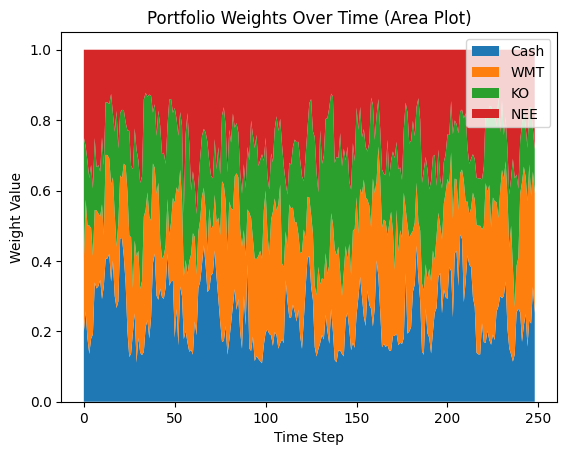

In [14]:
# WEIGHTS PLOTTING
# Assuming `weights_array` contains your data
weights_array = np.array(episode_weights)

# Extract the time steps
time_steps = np.arange(weights_array.shape[0])

plt.stackplot(time_steps,weights_array.T)
plt.xlabel('Time Step')
plt.ylabel('Weight Value')
plt.legend(labels = ['Cash', CONFIG_TARGET_INSTRUMENTS[0],CONFIG_TARGET_INSTRUMENTS[1],CONFIG_TARGET_INSTRUMENTS[2]])
plt.title('Portfolio Weights Over Time (Area Plot)')
plt.show()

# CALCULATE DDPG PORTFOLIO VALUE

In [15]:
# Set the initial investment
initial_investment_euros = 100

portfolio_absolute_returns = pd.Series(episode_returns)


# Calculate the portfolio value over time
portfolio_value = portfolio_absolute_returns.cumsum() + initial_investment_euros

# Create a DataFrame for visualization (optional)
portfolio_df = pd.DataFrame({
    'Date': portfolio_absolute_returns.index,  # Assuming the index represents dates
    'Portfolio Value': portfolio_value
})



#CALCULATE EQUALLY WEIGHTED PORTFOLIO RETURNS


In [16]:
df = pd.read_csv('test_data.csv', parse_dates=["date"])
df

,date,instrument,high,low,open,close,volume,quoteVolume,weightedAverage,vh,...,open_s_roll_30,volume_s_roll_7,volume_s_roll_14,volume_s_roll_30,quoteVolume_s_roll_7,quoteVolume_s_roll_14,quoteVolume_s_roll_30,weightedAverage_s_roll_7,weightedAverage_s_roll_14,weightedAverage_s_roll_30
0,2023-01-03 16:00:00-08:00,WMT,143.710007,142.089996,142.550003,143.600006,5749900,3.999319e+08,69.554576,1.008138,...,-0.148666,1.677714e+05,-51964.285714,-83796.666667,1.169476e+07,-3.564360e+06,-5.755189e+06,0.005571,0.007718,0.008864
1,2023-01-03 16:00:00-08:00,KO,63.560001,62.180000,63.560001,62.950001,12180500,4.469320e+08,36.692418,1.000000,...,0.112333,2.527429e+05,38042.857143,32263.333333,9.304157e+06,1.444533e+06,1.231674e+06,0.002921,0.004177,0.004268
2,2023-01-03 16:00:00-08:00,NEE,84.900002,82.540001,84.370003,83.830002,5535400,1.622067e+08,29.303524,1.006282,...,0.037000,2.560000e+04,13321.428571,-93283.333333,7.797542e+05,4.324607e+05,-2.669638e+06,0.005523,0.007870,0.007667
3,2023-01-04 16:00:00-08:00,WMT,144.050003,142.070007,143.419998,143.759995,4446100,3.092737e+08,69.560674,1.004393,...,-0.208333,1.218571e+04,-239757.142857,-62763.333333,8.719987e+05,-1.662042e+07,-4.310476e+06,0.005584,0.007337,0.008751
4,2023-01-04 16:00:00-08:00,KO,63.330002,62.509998,63.150002,62.919998,13387900,4.912966e+08,36.697059,1.002850,...,0.072000,5.316000e+05,-295264.285714,99076.666667,1.953812e+07,-1.076434e+07,3.680707e+06,0.003099,0.004052,0.004309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2023-12-28 16:00:00-08:00,NEE,61.099998,60.119999,60.119999,61.020000,5981900,1.882800e+08,31.474949,1.016301,...,0.134667,-6.819571e+05,-446328.571429,-247253.333333,-2.139967e+07,-1.395150e+07,-7.683690e+06,0.006034,0.007904,0.007358
746,2023-12-28 16:00:00-08:00,KO,58.869999,58.529999,58.650002,58.750000,8400100,3.165157e+08,37.679996,1.003751,...,0.054333,-1.188229e+06,-227700.000000,-143233.333333,-4.472467e+07,-8.527673e+06,-5.346536e+06,0.002858,0.004493,0.003977
747,2023-12-29 16:00:00-08:00,WMT,158.080002,157.160004,157.529999,157.649994,7314200,5.260144e+08,71.916869,1.003491,...,-0.361667,-1.178286e+05,-287785.714286,-153636.666667,-8.395900e+06,-2.054728e+07,-1.087201e+07,0.009579,0.013168,0.014849
748,2023-12-29 16:00:00-08:00,KO,58.980000,58.630001,58.740002,58.930000,9241600,3.482463e+08,37.682469,1.004086,...,0.048000,-7.672286e+05,-138285.714286,-32010.000000,-2.887234e+07,-5.161126e+06,-1.165665e+06,0.002651,0.004457,0.003975


In [17]:
ASST1_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[0]].reset_index(drop=True)
ASST2_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[1]].reset_index(drop=True)
ASST3_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[2]].reset_index(drop=True)

# Calculate returns for each coin
ASST1_returns = ASST1_values['close'].pct_change().dropna() / 3
ASST2_returns = ASST2_values['close'].pct_change().dropna() / 3
ASST3_returns = ASST3_values['close'].pct_change().dropna() / 3

# Create a new array with equally weighted returns
equally_weighted_returns = ASST1_returns + ASST2_returns + ASST3_returns

# Create a DataFrame for visualization (optional)
returns_equally_weighted = pd.DataFrame({
    CONFIG_TARGET_INSTRUMENTS[0]: ASST1_returns,
    CONFIG_TARGET_INSTRUMENTS[1]: ASST2_returns,
    CONFIG_TARGET_INSTRUMENTS[2]: ASST3_returns,
    'equally_weighted': equally_weighted_returns
})

# Display the result
print(returns_equally_weighted['equally_weighted'][0:250])

1      0.002837
2     -0.012289
3      0.018712
4     -0.006636
5     -0.000899
         ...   
245    0.006719
246    0.003427
247    0.006035
248    0.001994
249   -0.000339
Name: equally_weighted, Length: 249, dtype: float64


# EW PORTFOLIO VALUE

In [18]:
# Set the initial investment
initial_investment = 100  # in euros

# Calculate the portfolio value at each time step
portfolio_values = (1 + returns_equally_weighted['equally_weighted']).cumprod() * initial_investment

# Create a DataFrame to visualize the results
portfolio_value_equally_weighted = pd.DataFrame({
    'Date': returns_equally_weighted.index,  # Assuming the index represents dates
    'Portfolio Value': portfolio_values
})

# Display the result
print(portfolio_value_equally_weighted)

     Date  Portfolio Value
1       1       100.283685
2       2        99.051335
3       3       100.904784
4       4       100.235203
5       5       100.145098
..    ...              ...
245   245        90.542817
246   246        90.853136
247   247        91.401436
248   248        91.583657
249   249        91.552605

[249 rows x 2 columns]


#STOCKS PLOTTING

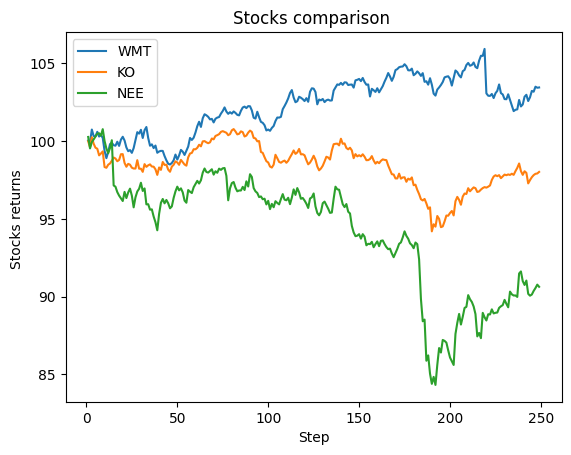

In [21]:
ASST1_portofolio =(1 + returns_equally_weighted[CONFIG_TARGET_INSTRUMENTS[0]]).cumprod() * initial_investment
ASST2_portfolio =(1 + returns_equally_weighted[CONFIG_TARGET_INSTRUMENTS[1]]).cumprod() * initial_investment
ASST3_portfolio =(1 + returns_equally_weighted[CONFIG_TARGET_INSTRUMENTS[2]]).cumprod() * initial_investment
plt.plot(ASST1_portofolio[0:250])
plt.plot(ASST2_portfolio[0:250])
plt.plot(ASST3_portfolio[0:250])
plt.xlabel('Step')
plt.ylabel('Stocks returns ')
plt.title('Stocks comparison ')
plt.legend(labels=[CONFIG_TARGET_INSTRUMENTS[0], CONFIG_TARGET_INSTRUMENTS[1],CONFIG_TARGET_INSTRUMENTS[2]])
plt.show()

#COMPARISON PLOT

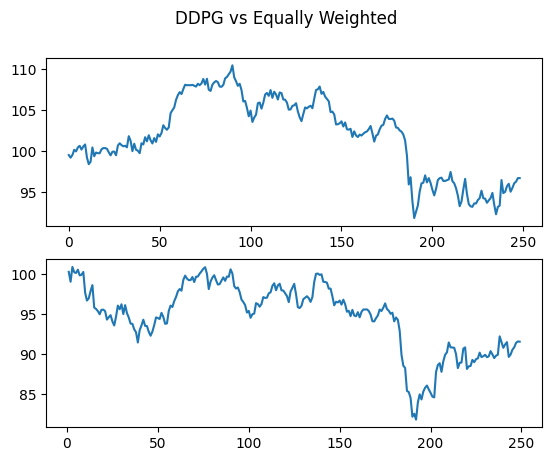

In [22]:
fig, axs = plt.subplots(2)
fig.suptitle('DDPG vs Equally Weighted')
axs[0].plot(portfolio_df['Portfolio Value'])
axs[1].plot(portfolio_value_equally_weighted['Portfolio Value'][0:250])

In [24]:
ASST1_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[0]].reset_index(drop=True)
ASST2_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[1]].reset_index(drop=True)
ASST3_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[2]].reset_index(drop=True)

# Calculate returns for each stock
ASST1_returns = ASST1_values['close'].pct_change().dropna() / 4
ASST2_returns = ASST2_values['close'].pct_change().dropna() / 4
ASST3_returns = ASST3_values['close'].pct_change().dropna() / 4
cash_returns = pd.Series([0] * len(ASST1_returns), name='cash')


# Create a new array with equally weighted returns
equally_weighted_returns_cash = ASST1_returns + ASST2_returns + ASST3_returns + cash_returns

# Create a DataFrame for visualization
returns_equally_weighted_cash = pd.DataFrame({
    CONFIG_TARGET_INSTRUMENTS[0]: ASST1_returns,
    CONFIG_TARGET_INSTRUMENTS[1]: ASST2_returns,
    CONFIG_TARGET_INSTRUMENTS[2]: ASST3_returns,
    'Cash': cash_returns,
    'Equally Weighted': equally_weighted_returns_cash
})

# Set the initial investment
initial_investment = 100  # in euros

# Calculate the portfolio value at each time step
portfolio_values = (1 + returns_equally_weighted_cash['Equally Weighted']).cumprod() * initial_investment

# Create a DataFrame to visualize the results
portfolio_value_equally_weighted_cash = pd.DataFrame({
    'Date': returns_equally_weighted_cash.index,  # Assuming the index represents dates
    'Portfolio Value': portfolio_values
})

# Display the result
print(portfolio_value_equally_weighted_cash)

     Date  Portfolio Value
0       0              NaN
1       1       100.212764
2       2        99.289155
3       3       100.682579
4       4       100.181499
..    ...              ...
245   245        93.001536
246   246        93.240596
247   247        93.662626
248   248        93.802674
249   249              NaN

[250 rows x 2 columns]


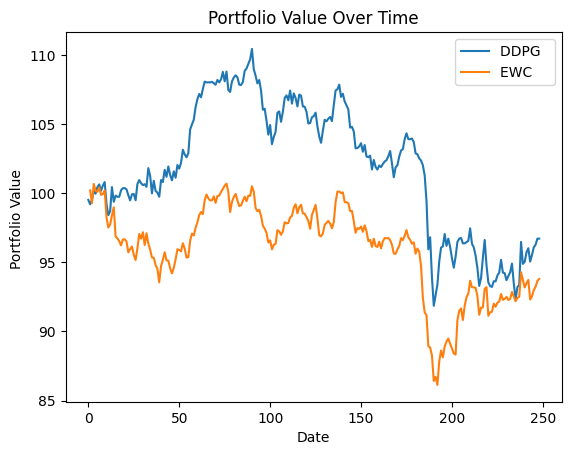

In [25]:
# Plot the portfolio value vs the equally weighted over time WITH CASH
plt.plot(portfolio_df['Portfolio Value'])
plt.plot(portfolio_value_equally_weighted_cash['Portfolio Value'][0:250])
plt.xlabel('Date')
plt.ylabel('Portfolio Value ')
plt.title('Portfolio Value Over Time')
plt.legend(labels=['DDPG  ', 'EWC '])
plt.show()

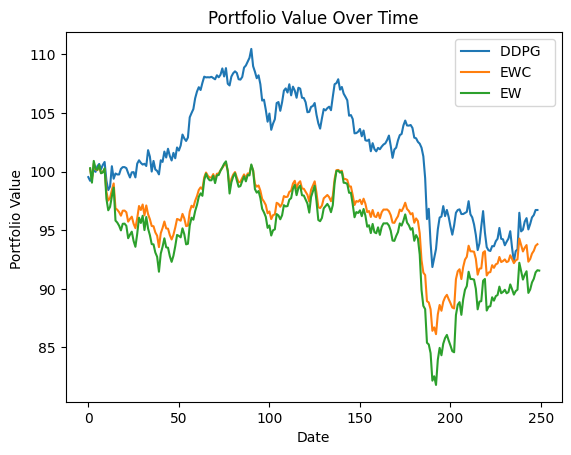

In [27]:
# Plot the portfolio value vs the equally weighted over time WITH CASH
plt.plot(portfolio_df['Portfolio Value'])
plt.plot(portfolio_value_equally_weighted_cash['Portfolio Value'][0:250])
plt.plot(portfolio_value_equally_weighted['Portfolio Value'][0:250])
plt.xlabel('Date')
plt.ylabel('Portfolio Value ')
plt.title('Portfolio Value Over Time')
plt.legend(labels=['DDPG  ', 'EWC', 'EW'])
plt.show()

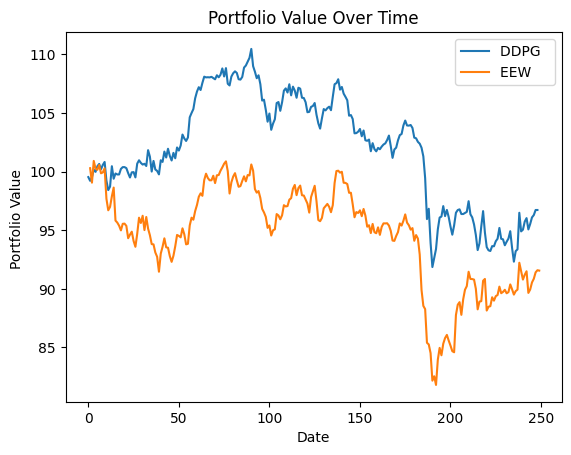

In [28]:
# Plot the portfolio value vs the equally weighted over time WITHOUT CASH
plt.plot(portfolio_df['Portfolio Value'])
plt.plot(portfolio_value_equally_weighted['Portfolio Value'][0:250])
plt.xlabel('Date')
plt.ylabel('Portfolio Value ')
plt.title('Portfolio Value Over Time')
plt.legend(labels=['DDPG  ', 'EEW '])
plt.show()

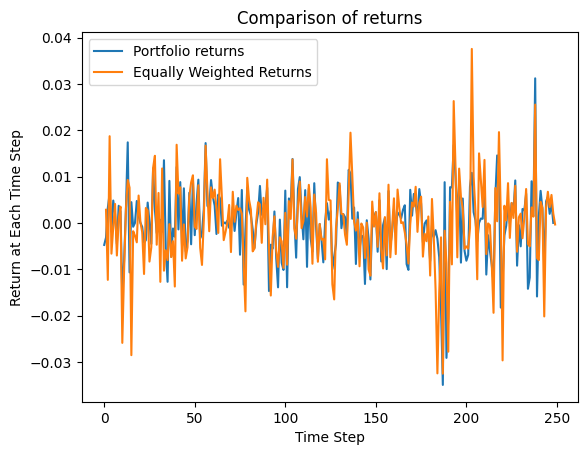

In [29]:

plt.plot([arr /100 for arr in episode_returns])
plt.plot(returns_equally_weighted['equally_weighted'][0:250])
plt.ylabel('Return at Each Time Step')
plt.xlabel('Time Step')
plt.title('Comparison of returns')
plt.legend(labels=['Portfolio returns', 'Equally Weighted Returns'])
plt.show()

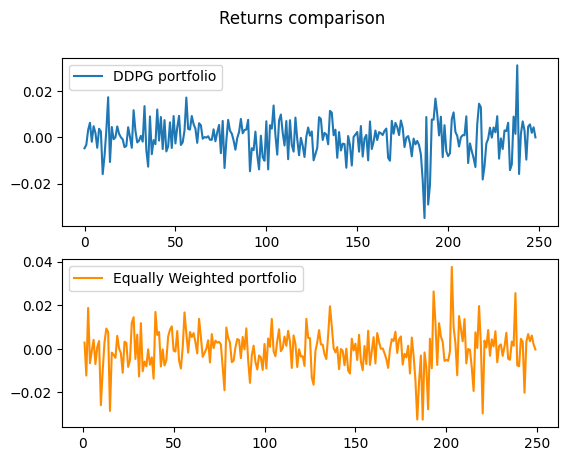

In [30]:
fig, axs = plt.subplots(2)
fig.suptitle('Returns comparison')
axs[0].plot([arr /100 for arr in episode_returns],label= 'DDPG portfolio')
axs[1].plot(returns_equally_weighted['equally_weighted'][0:250], color = '#FF8C00', label= 'Equally Weighted portfolio')
axs[0].legend()
axs[1].legend()

# METRICS

In [40]:
def calculate_metrics(portfolio_returns,portfolio_value, portfolio_name):
    portfolio_returns = np.array(portfolio_returns)
    portfolio_returns = portfolio_returns[~np.isnan(portfolio_returns)]
    # Calculate metrics
    average_return = np.mean(portfolio_returns)
    volatility = np.std(portfolio_value)
    sharpe_ratio = (average_return / volatility)*100

    # Assuming a target return of 0 for Sortino Ratio
    downside_returns = np.minimum(0, portfolio_returns - 0)
    downside_deviation = np.sqrt(np.mean(downside_returns ** 2))
    sortino_ratio = average_return / downside_deviation

    # Calculate overall return (cumulative return)
    overall_return = np.prod(1 + portfolio_returns) - 1

    # Create a DataFrame
    metrics_dict = {
        "Volatility": volatility,
        "Average Return": average_return,
        "Sharpe Ratio": sharpe_ratio,
        "Sortino Ratio": sortino_ratio,
        "Overall Return": overall_return
    }

    return pd.DataFrame(metrics_dict , index=[portfolio_name])


In [41]:
portfolio_DDPG_metrics = calculate_metrics([arr /10 for arr in episode_returns],portfolio_df['Portfolio Value'],'portfolio_DDPG')
EW_portfolio_metrics = calculate_metrics(returns_equally_weighted['equally_weighted'],portfolio_value_equally_weighted['Portfolio Value'][0:250],'EW_portfolio')


all_portfolios_metrics = pd.concat([portfolio_DDPG_metrics, EW_portfolio_metrics ])

# Save to CSV
all_portfolios_metrics.to_csv('portfolio_metrics.csv')
all_portfolios_metrics.to_excel('portfolio_metrics_DDPG.xlsx')
# Print results
print("Portfolio DDPG Metrics:", portfolio_DDPG_metrics)
print("Portfolio EW Metrics:", EW_portfolio_metrics)


Portfolio DDPG Metrics:                 Volatility  Average Return  Sharpe Ratio  Sortino Ratio  \
portfolio_DDPG    4.712805       -0.001317     -0.027949      -0.022591   

                Overall Return  
portfolio_DDPG       -0.667737  
Portfolio EW Metrics:               Volatility  Average Return  Sharpe Ratio  Sortino Ratio  \
EW_portfolio    4.276522       -0.000313     -0.007308       -0.04555   

              Overall Return  
EW_portfolio       -0.084474  
